In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, accuracy_score)

<h2>Data Analysis</h2>

In [2]:
S = pd.read_csv('smarket.csv')
S.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [3]:
S['Direction'].value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

In [4]:
S.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


There is significant correlation between Year and Volume.

In [5]:
#Encoding Up as 1, Down as 0
S.Direction = pd.Categorical(S.Direction)
S['Direction'] = S.Direction.cat.codes
S.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


<h2>Logistic Regression</h2>

In [6]:
import statsmodels.formula.api as smf

In [7]:
reg = smf.logit('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=S).fit()
reg.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sat, 01 May 2021   Pseudo R-squ.:                0.002074
Time:                        12:26:21   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [8]:
predictions = np.round(reg.predict(S)).astype('int64')
cm = confusion_matrix(predictions, S['Direction']) 

print ("Confusion Matrix : \n", cm) 
print('Test accuracy = ', accuracy_score(S['Direction'], predictions))

Confusion Matrix : 
 [[145 141]
 [457 507]]
Test accuracy =  0.5216


In [9]:
#Retraining model on Training set 

TrainS = S[S['Year']!=2005]
TestS = S[S['Year']==2005]
reg1 = smf.logit('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=TrainS).fit()

predictions = np.round(reg1.predict(TestS)).astype('int64')
cm = confusion_matrix(predictions, TestS['Direction']) 
print ("Confusion Matrix : \n", cm) 
print('Test accuracy = ', accuracy_score(TestS['Direction'], predictions))

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4
Confusion Matrix : 
 [[77 97]
 [34 44]]
Test accuracy =  0.4801587301587302


The above model performs poorly on Test Set.

In [10]:
#Training model on Lag1, Lag2 predictor...
reg3 = smf.logit('Direction~Lag1+Lag2', data=TrainS).fit()

predictions = np.round(reg3.predict(TestS)).astype('int64')
cm = confusion_matrix(predictions, TestS['Direction']) 
print ("Confusion Matrix : \n", cm) 
print('Test accuracy = ', accuracy_score(TestS['Direction'], predictions))

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3
Confusion Matrix : 
 [[ 35  35]
 [ 76 106]]
Test accuracy =  0.5595238095238095


Now the model performs better.

<h2>Linear Discriminant Analysis<h2/>

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
lda = LinearDiscriminantAnalysis()
lda.fit(TrainS[['Lag1','Lag2']], TrainS['Direction'])
print('LDA weight coefficients : ', lda.coef_)
print('\nPrior group Possibilities : ', lda.priors_)
print('\nGroup Means : \n', lda.means_)
print('\nExplained variance : ',lda.explained_variance_ratio_)

LDA weight coefficients :  [[-0.05544078 -0.0443452 ]]

Prior group Possibilities :  [0.49198397 0.50801603]

Group Means : 
 [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]

Explained variance :  [1.]


In [13]:
predictions = lda.predict( TestS[['Lag1','Lag2']] )
cm = confusion_matrix(predictions, TestS['Direction']) 
print('Test Accuracy : ', accuracy_score(TestS['Direction'], predictions) )
print('Confusion Matrix\n', cm)

Test Accuracy :  0.5595238095238095
Confusion Matrix
 [[ 35  35]
 [ 76 106]]


<h2>Quadratic Discriminant Analysis</h2>

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [15]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(TrainS[['Lag1','Lag2']], TrainS['Direction'])
print('\nPrior group Possibilities : ', qda.priors_)
print('\nGroup Means : \n', qda.means_)


Prior group Possibilities :  [0.49198397 0.50801603]

Group Means : 
 [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [16]:
predictions = qda.predict( TestS[['Lag1','Lag2']] )
cm = confusion_matrix(predictions, TestS['Direction']) 
print('Test Accuracy : ', accuracy_score(TestS['Direction'], predictions) )
print('Confusion Matrix\n', cm)

Test Accuracy :  0.5992063492063492
Confusion Matrix
 [[ 30  20]
 [ 81 121]]


Quadratic Decision Boundary suits well to the Dataset. <br>
QDA predicts the market approximately 60% which is quite impressive than LDA and Logistic Regression.

<h2>K-Nearest Neighbors</h2>

In [17]:
from sklearn.neighbors import KNeighborsClassifier 

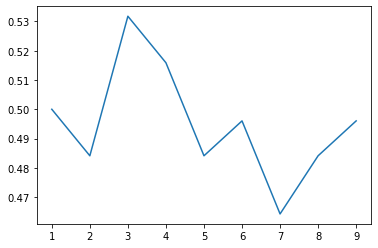

In [18]:
Scores = []
k = [i for i in range(1,10)]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(TrainS[['Lag1','Lag2']], TrainS['Direction'])
    predictions = knn.predict( TestS[['Lag1','Lag2']] )
    Scores.append(accuracy_score(TestS['Direction'], predictions))
plt.plot(k, Scores)

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(TrainS[['Lag1','Lag2']], TrainS['Direction'])

predictions = knn.predict( TestS[['Lag1','Lag2']] )
cm = confusion_matrix(predictions, TestS['Direction']) 
print('Test Accuracy : ', accuracy_score(TestS['Direction'], predictions) )
print('Confusion Matrix\n', cm)

Test Accuracy :  0.5317460317460317
Confusion Matrix
 [[48 55]
 [63 86]]
